In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('drive')
df = pd.read_csv('drive/My Drive/heart.csv', sep=",")
df

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


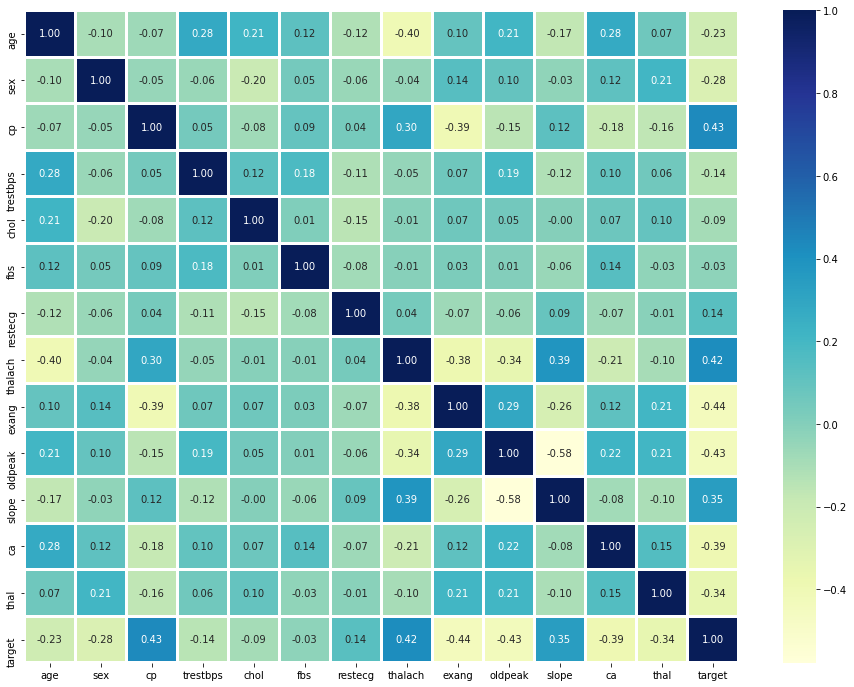

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
X_train = df.drop(columns=['target'])
y_train = df['target']
DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(criterion="entropy",max_depth=6)
#fiting the model
DT=DT.fit(X_train, y_train)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

Accuracy  94.5054945054945


In [ ]:
from sklearn import tree
import graphviz

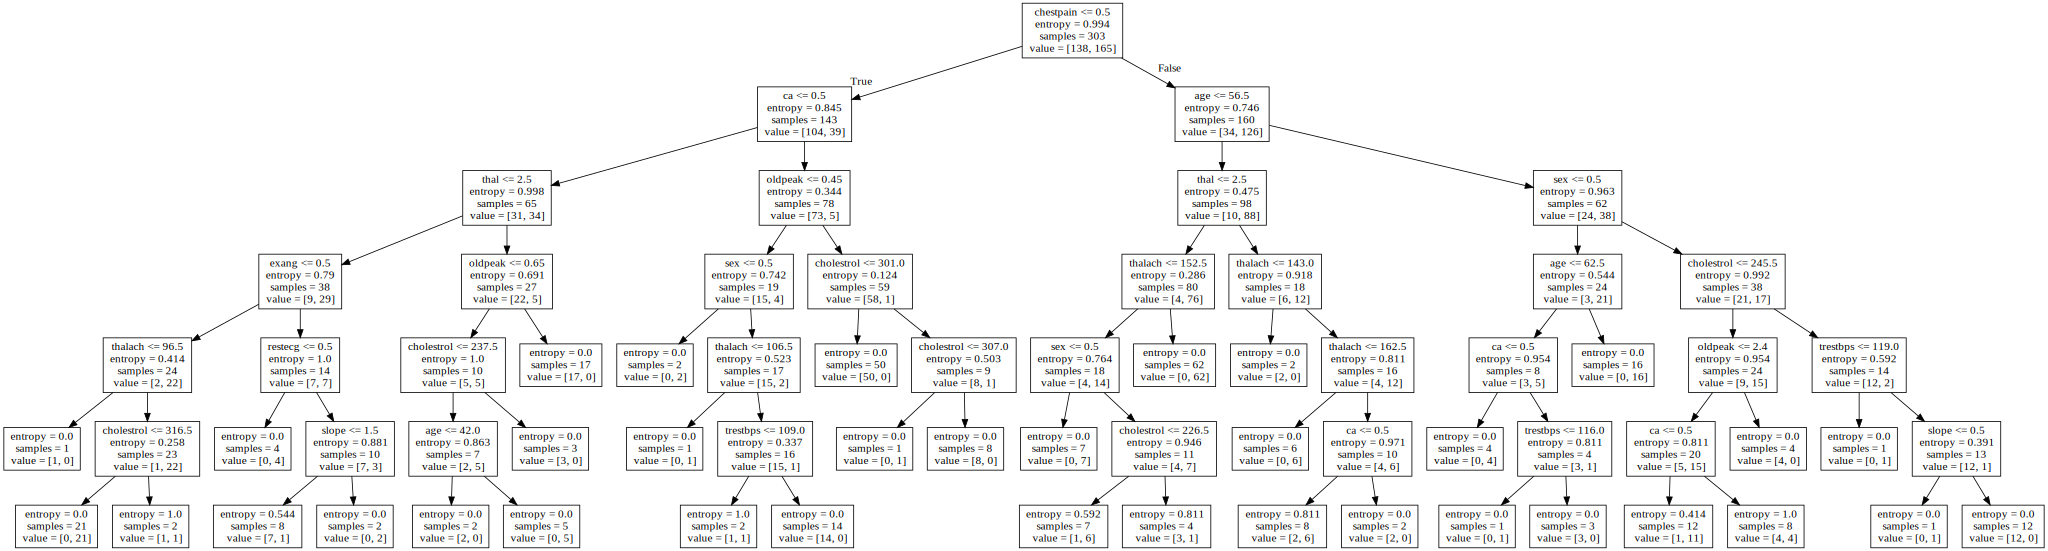

In [ ]:
#Plotting the graph
tree_graph = tree.export_graphviz(DT, out_file=None, feature_names = ['age',' sex','chestpain','trestbps','cholestrol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
graphviz.Source(tree_graph)

In [ ]:
print("Input your age :")
age = int(input("Age : "))

print("Choose your gender : 1.Male 0.Female")
gender = int(input("Gender : "))

print("Choose your chest pain type : 1.typical angina 2.atypical angina 3.non-anginal pain 4.asymptomatic")
chestpain = int(input("Chest Pain : "))

print ("Input your resting blood pressure : ")
trestbps = int(input("Resting Blood Pressure : "))

print("Input your serum cholestoral in mg/dl : ")
chol = int(input("Cholestoral in mg/dl :"))

print("Does your fasting blood sugar above 120mg/dl? : 1.True 0.False")
fbs = int(input("Fasting Blood Sugar : "))

print("Choose your resting electrocardiographic results : 0.normal 1.abnormal 2.probable or definite left ventricular hypertrophy")
restecg = int(input("Choose : "))

print("Input your maximum heart rate achieved : ")
thalach = int(input("Maximum heart rate Achieved : "))

print("Does your exercise induced agina : 1.Yes 0.No")
exang = int(input("Choose : "))

print("Input your ST depression induced by exercise relative to rest : ")
oldpeak = float(input("Input : "))

print("Choose your slope of the peak exercise ST segment: 1.upsloping 2.flat 3.downsloping")
slope = int(input("Choose : "))

print ("Input your number of major vessels (0-3) colored by flourosopy")
ca = int(input("CA : "))

print("Choose your Thal : 0.Normal 1.Fixed defect 2.Reversable defect")
thal = int(input("Choose : "))

prediction = DT.predict([[age, gender, chestpain, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
if prediction[0] == 0:
  print("Potential for Heart Attack is small")
elif prediction[0] == 1:
  print("Potential for Heart Attack is big")

Input your age :


KeyboardInterrupt: ignored